## Twitter US Airline Sentiment Analysis
### Problem Statement: 

The rapid growth of Twitter's user base and the abundance of information available on the platform present a challenge for businesses to efficiently identify and address negative social mentions that may have a detrimental impact on their reputation and overall business performance. As a result, there is a need for an effective sentiment analysis or classification system that can monitor and analyze emotions expressed in conversations on Twitter, enabling businesses to proactively manage their online presence, gain insights into customer perceptions, monitor competitor activity, and identify emerging industry trends.

* **Problem:** We need to build a sentiment analysis model that can accurately classify the sentiment of tweets.
* **Context:** We are using the Twitter sentiment analysis dataset, which contains about 14,641 tweets.
* **Assumptions:** We assume that the tweets in the dataset are representative of tweets in general.
* **Goal:** We want to achieve an accuracy of at least 80%.
* **Constraints:** We want to use a simple algorithm that is easy to understand and interpret.

In [2]:
# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters 

import unidecode

# Importing the NLTK library
import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

# downloading vader lexicon
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from sklearn.model_selection import train_test_split #create train and test data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Unsupervised learning models

# Install vader sentiment package
!pip install vaderSentiment 

# Install textblob package
!pip install textblob   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Loading the dataset

In [3]:
twitter = pd.read_csv('tweets.csv')

In [4]:
# Creating the copy of the data frame
data = twitter.copy()

In [5]:
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                                                                                             text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  tweet_coord              tweet_created tweet_location  \
0         NaN  2015-02-24 11:35:52 -0800            NaN   
1         NaN  2015-02-24 11:15:59 -0800            NaN   
2         NaN  2015-02-24 11:15:48 -0800      Lets Play   
3         NaN  2015-02-24 11:15:36 -0800            NaN   
4         NaN  2015-02-24 11:14:45 -0800            NaN   

                user_timezone  
0  Eastern Time (US & Canada)  
1  Pacific Time (US & Canada)  
2  Central Time (US & Canada)  
3  Pacific Time (US & Canada)  
4  Pacific Time (US & Canada)

In [6]:
data.shape

(14640, 15)

In [7]:
# Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Exploratory data analysis

Text(0, 0.5, 'No.of Tweets')

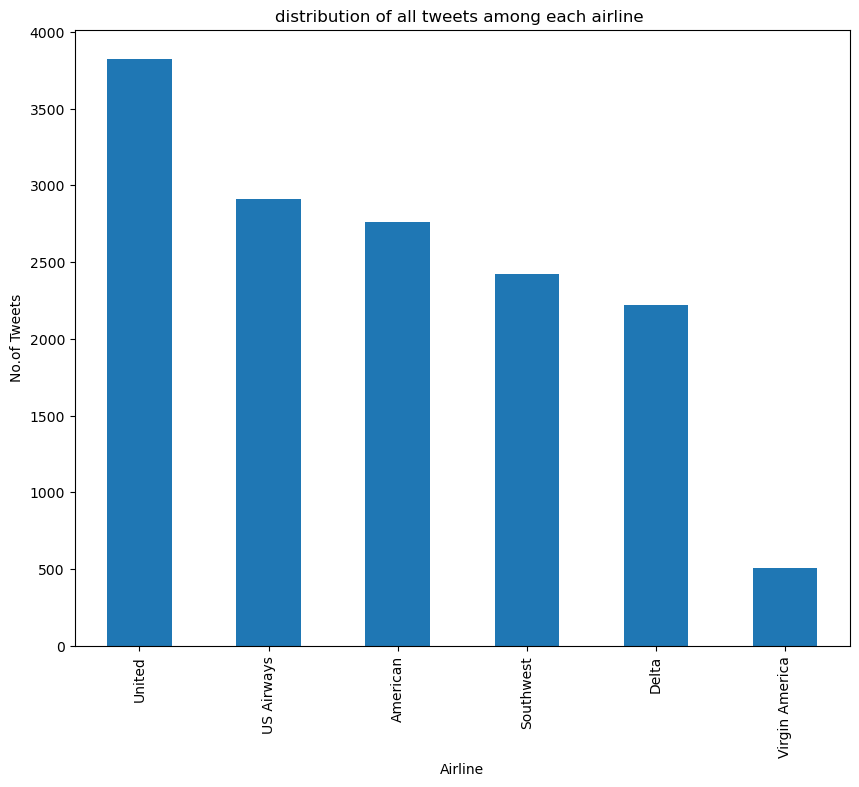

In [9]:
pd.Series(data['airline']).value_counts().plot(kind="bar",figsize=(10,8),fontsize=10,title='distribution of all tweets among each airline ')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

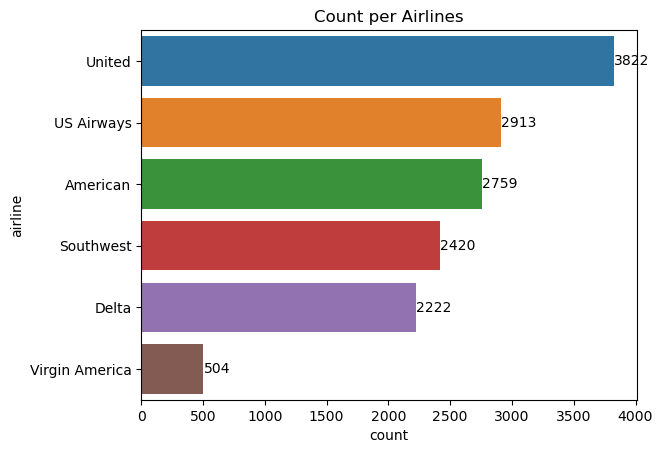

In [10]:
ax = sns.countplot(data = data, y = 'airline', order = data.airline.value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title('Count per Airlines',)                              
plt.show()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


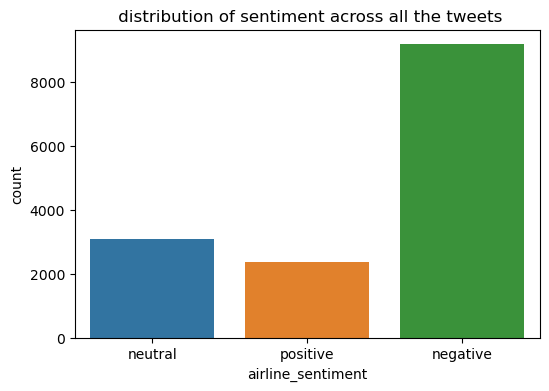

In [11]:
print(data.airline_sentiment.value_counts())
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = 'airline_sentiment', data = data)
ax.set_title(label = ' distribution of sentiment across all the tweets')
plt.show()

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


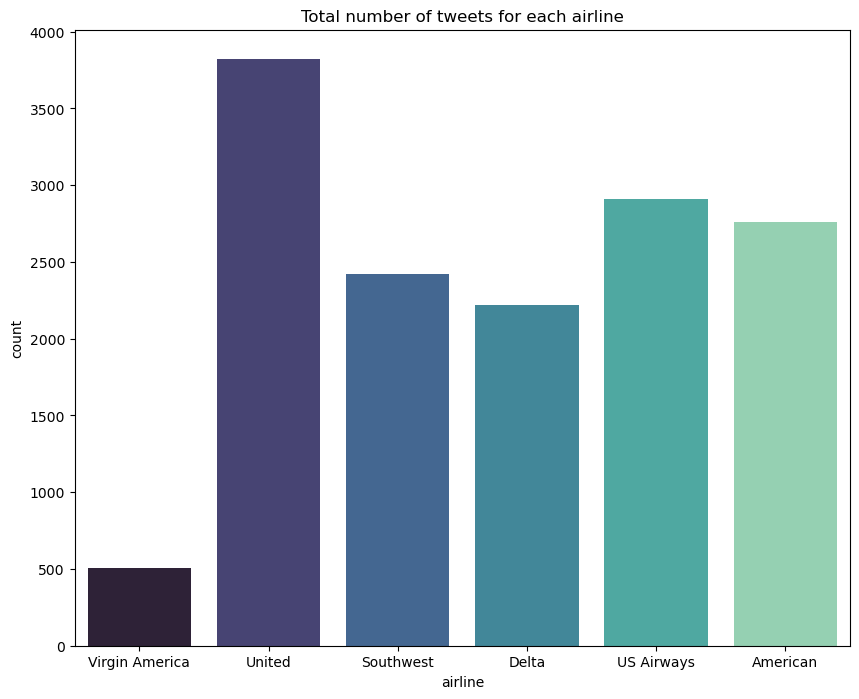

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [12]:
print("Total number of tweets for each airline :")
print(data.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = data, palette = 'mako')
ax.set_title(label = 'Total number of tweets for each airline')
plt.show()

print("Total number of sentiment tweets for each airline :",)
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),data.loc[data.airline == i].airline_sentiment.value_counts())
    
import plotly.graph_objects as go
company_sentiments=pd.crosstab(data.airline, data.airline_sentiment)
companies=list(company_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(company_sentiments[col_name]))
for col_name in list(company_sentiments.columns)])

fig.update_layout(barmode='stack',
                  title='distribution of sentiment of tweet',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


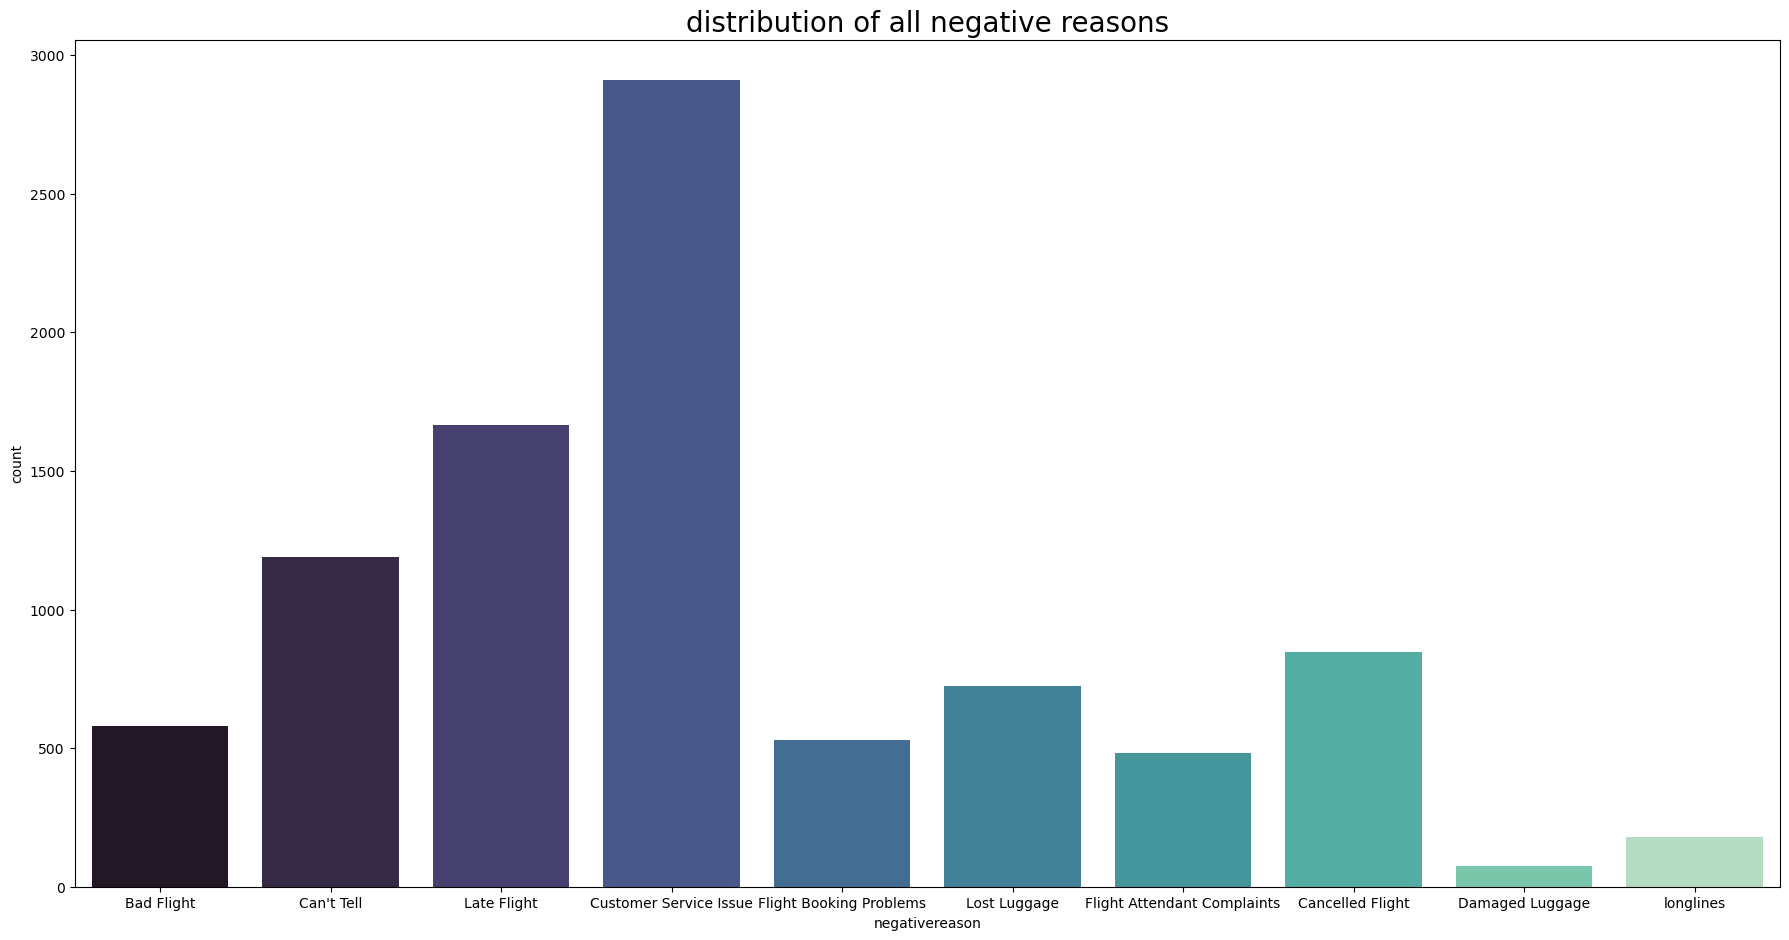

In [13]:
print(data.negativereason.value_counts())

plt.figure(figsize = (22, 11))
sns.countplot(x = 'negativereason', data = data, palette = 'mako')
plt.title('distribution of all negative reasons', fontsize = 20)
plt.show()

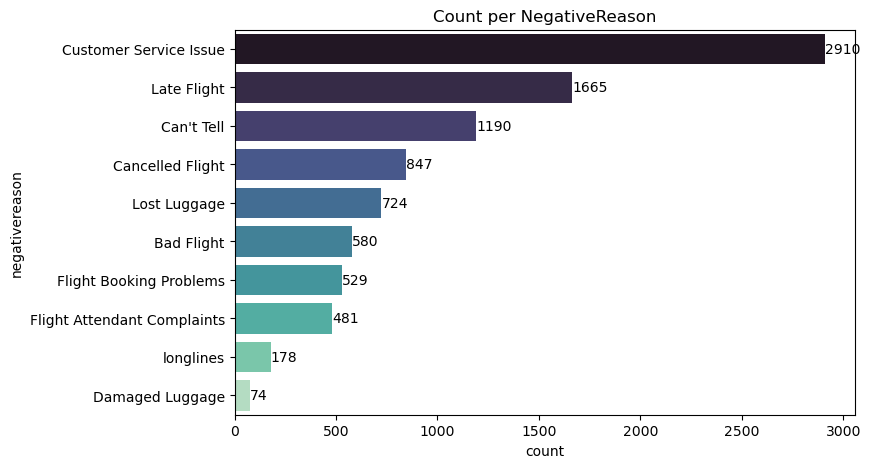

In [14]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = data, y = 'negativereason',
                   palette='mako',
                   order = data.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

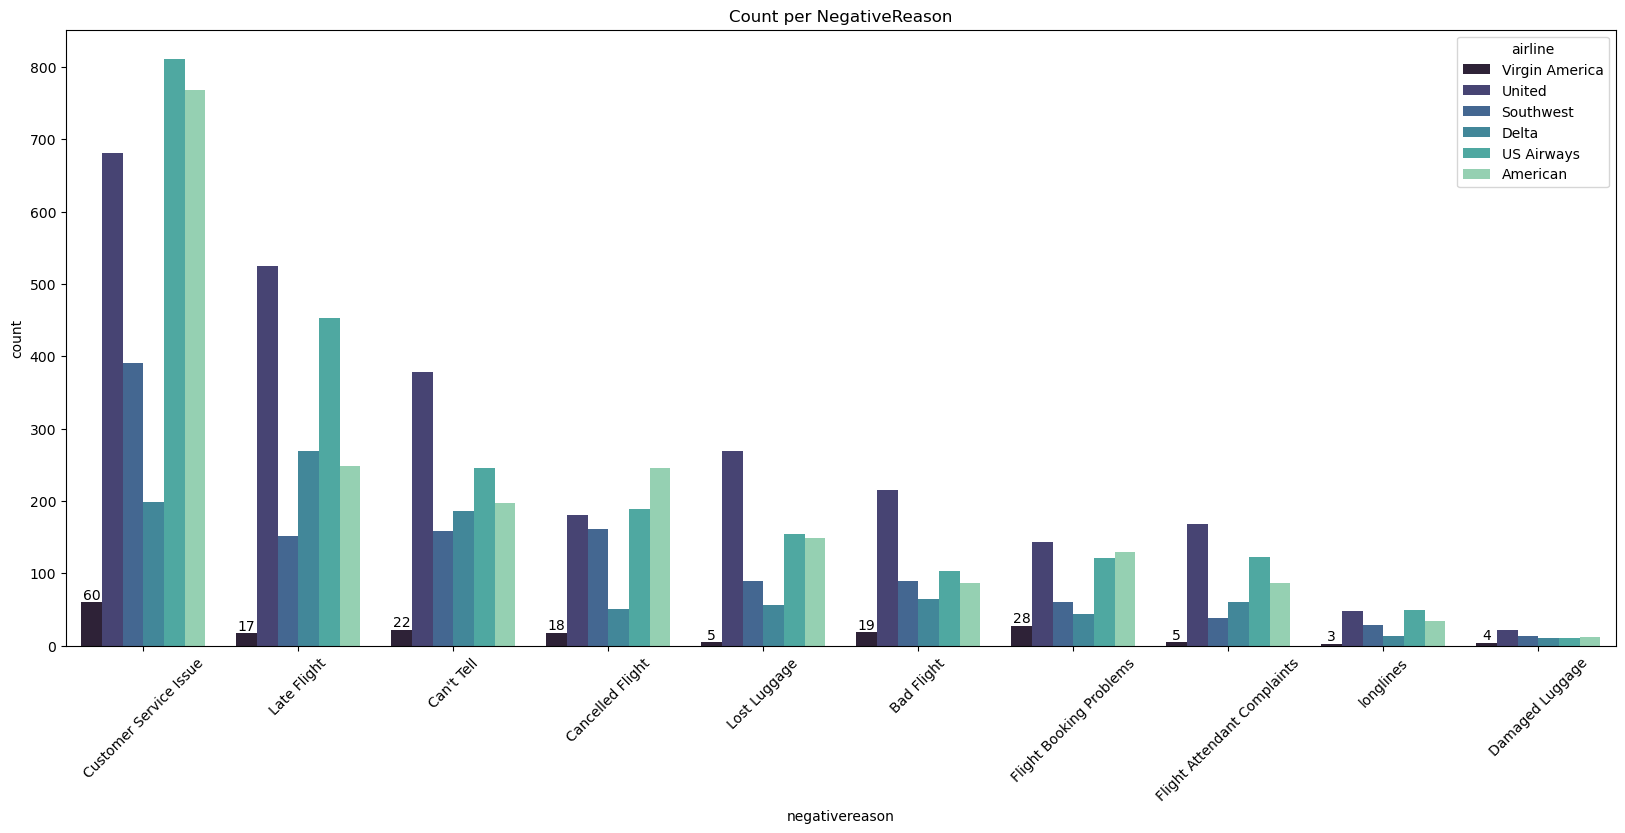

In [15]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = data, x = 'negativereason',
                   palette='mako',
                   order = data.negativereason.value_counts().index, hue = 'airline')

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')
plt.xticks(rotation=45)
plt.show()

## word cloud graph of tweets for positive and negative sentiment

In [16]:
#wordcloud for positive tweets
positive=data[data['airline_sentiment']=='positive'].text

In [17]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate("".join(positive))

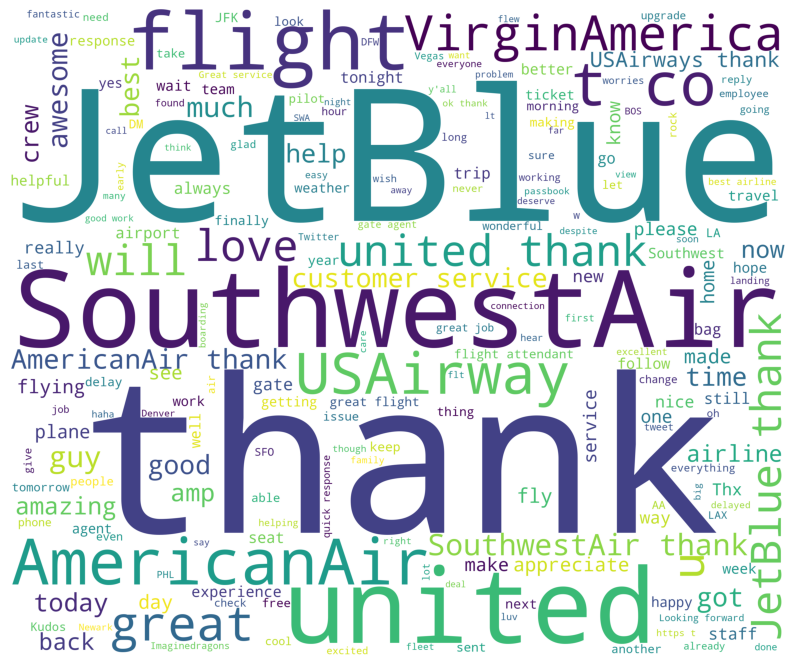

In [18]:
plt.figure(1, figsize = (10, 10))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

In [19]:
#wordcloud for negative tweets
negative=data[data['airline_sentiment']=='negative'].text

In [20]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate("".join(negative))

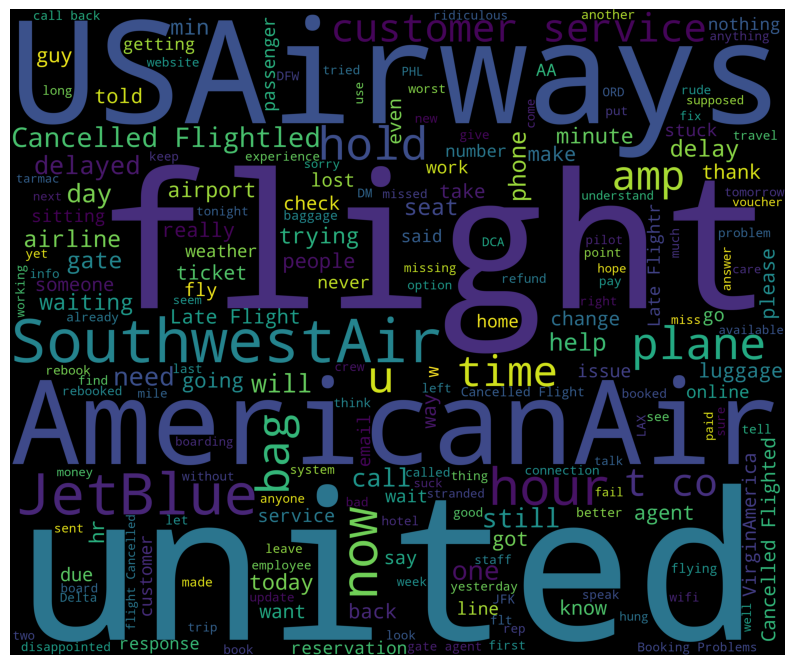

In [21]:
plt.figure(1, figsize = (10, 10))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

In [22]:
neutral = data[data['airline_sentiment']=='neutral'].text

In [23]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate("".join(neutral))

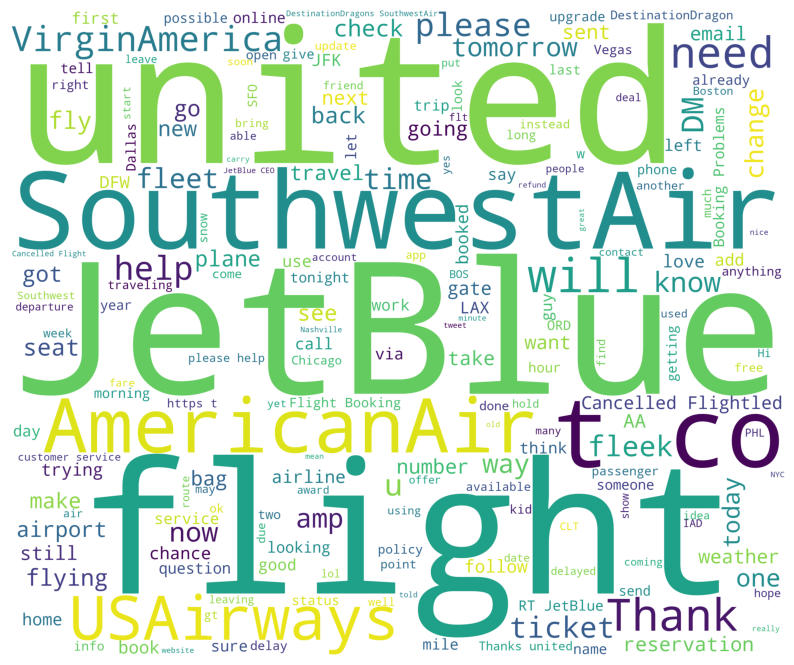

In [24]:
plt.figure(1, figsize = (10, 10))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

In [25]:
print("na values in data using percentage")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

na values in data using percentage


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

* airline_sentiment_gold and negativereason_gold has more than 99% missing data 
* tweet_coord has nearly 93% missing data. Its best to delete these columns as they will not provide any constructive information

In [26]:
del data["tweet_coord"]
del data["airline_sentiment_gold"]
del data["negativereason_gold"]

In [27]:
# Checking duplicates
data.duplicated().sum()

39

In [28]:
# Dropping duplicates
data.drop_duplicates(inplace = True)

In [29]:
data.duplicated().sum()

0

In [30]:
data.shape

(14601, 12)

### Data preprocessing

In [31]:
# Function to pre-process the text
def preprocess_text(text):
    # Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters and punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Conversion to lowercase
    text = ' '.join(filtered_tokens).lower()

    # Lemmatize or Stemming (you can choose one)
    lemmatizer = WordNetLemmatizer()
    # stemmer = PorterStemmer()
    # lemmatized_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    text = ' '.join(lemmatized_tokens)

    return text

# Apply pre-processing to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

In [32]:
data['text'].head(5)

0                                                                     VirginAmerica dhepburn said
1                                      VirginAmerica plus youve added commercial experience tacky
2                                      VirginAmerica didnt today Must mean need take another trip
3    VirginAmerica really aggressive blast obnoxious entertainment guest face amp little recourse
4                                                              VirginAmerica really big bad thing
Name: text, dtype: object

In [33]:
# Extract the text and target variable
X = data['text']
y = data['airline_sentiment']

In [34]:
X

0                                                                                             VirginAmerica dhepburn said
1                                                              VirginAmerica plus youve added commercial experience tacky
2                                                              VirginAmerica didnt today Must mean need take another trip
3                            VirginAmerica really aggressive blast obnoxious entertainment guest face amp little recourse
4                                                                                      VirginAmerica really big bad thing
                                                               ...                                                       
14635                                                                      AmericanAir thank got different flight Chicago
14636    AmericanAir leaving minute Late Flight warning communication minute Late Flight Thats called shitty customer svc
14637                   

In [35]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14601, dtype: object

### Count Vectorizer

In [36]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
Count_vec = CountVectorizer()  

X_count = Count_vec.fit_transform(data['text'])

# Convert the X_count to array
X_count = X_count.toarray()                      

In [37]:
# Shape of the feature vector
X_count.shape

(14601, 13760)

In [38]:
data.airline_sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14601, dtype: object

In [39]:
X = X_count

y = data.airline_sentiment

In [40]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive', 'neutral'], yticklabels = ['negative', 'positive', 'neutral'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [41]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

              precision    recall  f1-score   support

    negative       0.82      0.95      0.88      2628
     neutral       0.63      0.30      0.40       574
    positive       0.74      0.55      0.63       449

    accuracy                           0.80      3651
   macro avg       0.73      0.60      0.64      3651
weighted avg       0.78      0.80      0.78      3651



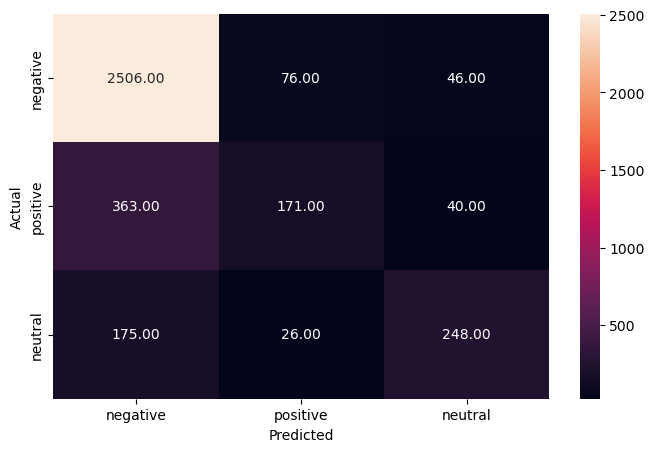

In [42]:
# Training the best model and calculating accuracy on test data 

clf = RandomForestClassifier(n_estimators = 200)

clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

metrics_score(y_test, y_pred_test)

### Cross-Validation

In [43]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

### Print cross-validation scores

In [44]:
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

Cross-validation Scores: [0.7283105  0.69863014 0.70410959 0.60410959 0.72968037]
Mean Cross-validation Score: 0.6929680365296804


### Now Random Forest Accuracy Score for count vectorizer

In [45]:
clf_prediction =  clf.predict(X_test)

In [46]:
accuracy_score(clf_prediction,y_test)

0.8011503697617092

In [47]:
def get_top40_words(model, all_features):
    
    # Addition of top 40 feature into top_feature after training the model
    top_features=''   

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','    

    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000, 
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

In [48]:
# Get the feature names from the vectorizer
feature_names = Count_vec.get_feature_names_out()

# Print the top 40 features
print("Top 40 Features:")
print(feature_names[:40])

Top 40 Features:
['__rwg__' '_austrian' '_defcon_' '_emmaclifford' '_exact_' '_justdippin_'
 '_lucy_may' '_robprice' 'a_life_story_' 'aa' 'aaaand' 'aaadvantage'
 'aaalwayslate' 'aaba' 'aacom' 'aacustomerservice' 'aadavantage' 'aadelay'
 'aadfw' 'aadv' 'aadvantage' 'aafail' 'aal' 'aampc' 'aano' 'aaron' 'aarp'
 'aas' 'aaso' 'aateam' 'aaus' 'ab' 'aback' 'abandon' 'abandoned'
 'abandonment' 'abassinet' 'abbreve' 'abc' 'abc_wtvd']


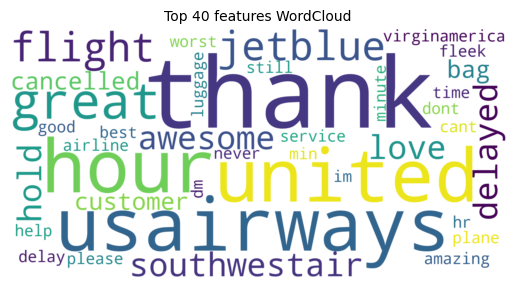

In [49]:
 #Instantiate the feature from the vectorizer
    
features = Count_vec.get_feature_names_out()   

get_top40_words(clf,features)

### **TF-IDF**

In [50]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

X_count = tfidf_vect.fit_transform(data['text'])

X_count = X_count.toarray()

# Feature shape
X_count.shape     

(14601, 13760)

In [51]:
X = X_count

y = data.airline_sentiment

In [52]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

              precision    recall  f1-score   support

    negative       0.81      0.97      0.88      2628
     neutral       0.64      0.22      0.33       574
    positive       0.79      0.49      0.60       449

    accuracy                           0.80      3651
   macro avg       0.74      0.56      0.61      3651
weighted avg       0.78      0.80      0.76      3651



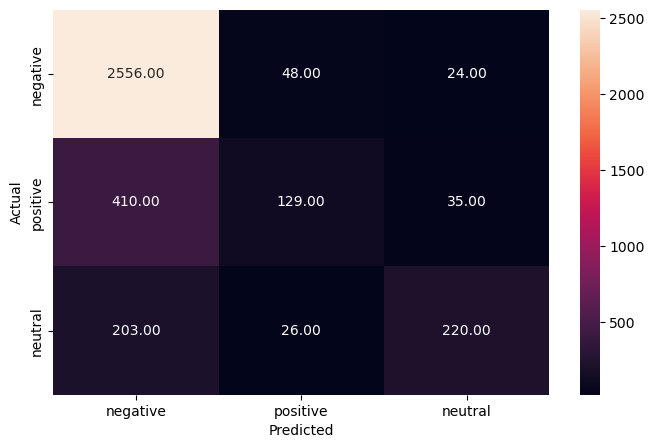

In [53]:
# Training the best model and calculating accuracy on test data 

clf1 = RandomForestClassifier(n_estimators = 200)

clf1.fit(X_train, y_train)

y_pred_test1 = clf1.predict(X_test)

metrics_score(y_test, y_pred_test1)

### Cross-validation

In [54]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf1, X_train, y_train, cv=5)

### Print cross-validation scores

In [55]:
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

Cross-validation Scores: [0.70091324 0.70365297 0.72922374 0.62739726 0.69178082]
Mean Cross-validation Score: 0.690593607305936


### Now Random Forest Accuracy Score for TF-IDF

In [56]:
clf1_prediction =  clf1.predict(X_test)

In [57]:
accuracy_score(clf1_prediction,y_test)

0.7956724185154752

In [58]:
# Get the feature names from the vectorizer
feature_names = tfidf_vect.get_feature_names_out()

# Print the top 40 features
print("Top 40 Features:")
print(feature_names[:40])

Top 40 Features:
['__rwg__' '_austrian' '_defcon_' '_emmaclifford' '_exact_' '_justdippin_'
 '_lucy_may' '_robprice' 'a_life_story_' 'aa' 'aaaand' 'aaadvantage'
 'aaalwayslate' 'aaba' 'aacom' 'aacustomerservice' 'aadavantage' 'aadelay'
 'aadfw' 'aadv' 'aadvantage' 'aafail' 'aal' 'aampc' 'aano' 'aaron' 'aarp'
 'aas' 'aaso' 'aateam' 'aaus' 'ab' 'aback' 'abandon' 'abandoned'
 'abandonment' 'abassinet' 'abbreve' 'abc' 'abc_wtvd']


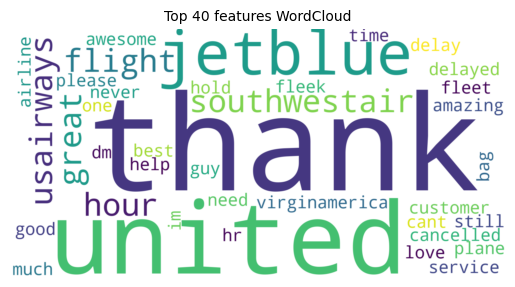

In [59]:
#Instantiate the feature from the vectorizer    
features = tfidf_vect.get_feature_names_out()  

get_top40_words(clf1,features)

### **Comparing the scores of Supervised Learning methods: Count Vectorizer and TF-IDF**

In [60]:
#convert the test samples into a dataframe where the columns are

#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),
#Count Vectorizer model predicted labels(count_vectorizer_predicted)

data = pd.DataFrame(y_test.tolist(), columns = ['y_test'])

data['count_vectorizer_predicted'] = y_pred_test

data['tf_idf_predicted'] = y_pred_test1

data.tail(10)

y_test count_vectorizer_predicted tf_idf_predicted
3641  positive                   positive         positive
3642  negative                   negative         negative
3643   neutral                   negative         negative
3644  negative                   negative         negative
3645  negative                   negative         negative
3646  positive                   positive         positive
3647  negative                   negative         negative
3648   neutral                    neutral          neutral
3649  negative                   negative         negative
3650   neutral                   negative         negative

# summary

Based on the application of various pre-processing techniques and vectorization on the Twitter airline sentiment dataset, here is a summary of the steps:

**Text Pre-processing**:
   - Html Tag Removal: Any HTML tags present in the text data are removed using regular expressions to clean the text.
   - Tokenization: The text is tokenized into individual words or tokens to break it down into smaller units for further analysis.
   - Remove Numbers: Any numeric digits present in the text are removed as they might not contribute significantly to sentiment analysis.
   - Removal of Special Characters and Punctuations: Special characters and punctuations are removed to focus on words' semantic meaning.
   - Removal of Stopwords: Common stopwords like "the," "is," "a," etc., are removed as they occur frequently and carry little sentiment information.
   - Conversion to Lowercase: All text is converted to lowercase to ensure that the model treats words with the same letters but different cases as the same word.
   - Lemmatization or Stemming: The words are lemmatized or stemmed to reduce them to their base or root form, ensuring variations of a word are treated as the same.

**Vectorization**:
   - CountVectorizer: The pre-processed text data is transformed into a sparse matrix of token counts, where each row represents a document, and each column represents a unique word (token) in the entire corpus. The values in the matrix represent the frequency of each word in the corresponding document.
   - TfidfVectorizer: The pre-processed text data is transformed into a sparse matrix using Term Frequency-Inverse Document Frequency (TF-IDF) representation. TF-IDF takes into account both the frequency of the word in a document and its rarity in the entire corpus, giving more weight to words that are rare in the entire dataset but frequent in a particular document.

**Model Training and Evaluation**:
   - The dataset is split into training and testing sets.
   - A classification model (Randomforest algorithm) is chosen for sentiment analysis.
   - The model is trained on the training set using the CountVectorizer and TfidfVectorizer transformed data separately
   - The model is evaluated on the testing set to measure its performance and accuracy in predicting sentiment labels.

**Cross-Validation**:
   - To obtain a more robust estimate of the model's performance, k-fold cross-validation is applied.
   - The data is split into 5 subsets (folds), and the model is trained and evaluated 5 times, with each fold being used as the test set once.
   - The final performance metric is typically the average of the performance scores obtained from all 5 iterations.

**Top Features**:
   - After transforming the pre-processed text data using CountVectorizer or TfidfVectorizer, the feature names (words/tokens) are extracted from the vectorizers.
   - The top 40 features are printed, which represent the most frequent words (CountVectorizer) or the words with the highest TF-IDF scores (TfidfVectorizer) in the entire corpus, and then a wordcloud is built for both.

These steps collectively help in preparing the Twitter airline sentiment data for sentiment analysis and building a classification model that can predict the sentiment of airline tweets accurately. The process involves cleaning and transforming the raw text data into a suitable format for machine learning algorithms, enabling us to make data-driven insights and predictions about the sentiment of tweets.

## Model Performance

* **Accuracy:**
    * TF-IDF: 79.5%
    * Count Vector: 80%

* **Estimators:** 200

* **Dataset:** Twitter sentiment analysis dataset (14,601 tweets)

* **Conclusion:**
    * Both TF-IDF and Count Vector achieved high accuracy on the dataset.
    * Count Vector had a slightly higher accuracy than TF-IDF.
    * The number of estimators was set to 200.